In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("tickets.csv")
df.head(2)

,ticket_id,client,service,logged_date,status,time_spent,assignee,logger
0,1000,A,A1,2024-02-10 19:41:00 UTC,closed,5,member1,user1
1,1001,D,B1,2024-06-03 04:22:00 UTC,closed,5,member3,user3


In [24]:
# Convert logged_date to datetime
df["logged_date"] = pd.to_datetime(df["logged_date"], format="%Y-%m-%d %H:%M:%S UTC")

In [25]:
# 1. Basic Statistics
print("Basic Statistics")
print(df.describe(include="all"))

Basic Statistics
          ticket_id client service                    logged_date  status  \
count   1000.000000   1000    1000                           1000    1000   
unique          NaN      5       6                            NaN       3   
top             NaN      B      D1                            NaN  closed   
freq            NaN    216     187                            NaN     338   
mean    1499.500000    NaN     NaN  2024-05-30 21:00:58.679999744     NaN   
min     1000.000000    NaN     NaN            2024-01-01 00:01:00     NaN   
25%     1249.750000    NaN     NaN            2024-03-18 01:27:45     NaN   
50%     1499.500000    NaN     NaN            2024-05-31 17:18:00     NaN   
75%     1749.250000    NaN     NaN            2024-08-13 14:23:00     NaN   
max     1999.000000    NaN     NaN            2024-10-26 23:08:00     NaN   
std      288.819436    NaN     NaN                            NaN     NaN   

         time_spent assignee logger  
count   1000.000000 

In [26]:
# 2. Ticket Distribution by Client
client_dist = df["client"].value_counts()
print("\nTicket Distribution by Client")
print(client_dist)


Ticket Distribution by Client
client
B    216
C    214
A    205
E    190
D    175
Name: count, dtype: int64


In [27]:
# 3. Service Usage Analysis
service_usage = df["service"].value_counts()
print("\nService Usage Analysis")
print(service_usage)


Service Usage Analysis
service
D1    187
E1    168
B1    166
F1    165
A1    161
C1    153
Name: count, dtype: int64


In [28]:
# 4. Status Distribution
status_dist = df["status"].value_counts()
print("\nStatus Distribution")
print(status_dist)


Status Distribution
status
closed               338
awaiting_response    338
assigned             324
Name: count, dtype: int64


In [29]:
# 5. Time Spent Analysis
print("\nTotal Time Spent on Tickets")
print(df["time_spent"].sum())


Total Time Spent on Tickets
4488


In [30]:
print("\nAverage Time Spent per Ticket")
print(df["time_spent"].mean())


Average Time Spent per Ticket
4.488


In [31]:
# 6. Assignee Workload
assignee_workload = df["assignee"].value_counts()
print("\nAssignee Workload")
print(assignee_workload)


Assignee Workload
assignee
member2    260
member4    259
member1    243
member3    238
Name: count, dtype: int64


In [32]:
# 7. Monthly Ticket Trend
df["month_year"] = df["logged_date"].dt.to_period("M")
monthly_trend = df["month_year"].value_counts().sort_index()
print("\nMonthly Ticket Trend")
print(monthly_trend)


Monthly Ticket Trend
month_year
2024-01     98
2024-02     98
2024-03     97
2024-04    102
2024-05    107
2024-06     89
2024-07    111
2024-08    123
2024-09     97
2024-10     78
Freq: M, Name: count, dtype: int64


In [33]:
# 8. Logger Contribution
logger_contribution = df["logger"].value_counts()
print("\nLogger Contribution")
print(logger_contribution)


Logger Contribution
logger
user3    269
user2    254
user4    240
user1    237
Name: count, dtype: int64


In [34]:
# 9. Ticket Distribution by Status and Client
status_client_dist = df.groupby(["status", "client"]).size().unstack(fill_value=0)
print("\nTicket Distribution by Status and Client")
print(status_client_dist)


Ticket Distribution by Status and Client
client              A   B   C   D   E
status                               
assigned           71  67  69  58  59
awaiting_response  70  70  69  60  69
closed             64  79  76  57  62


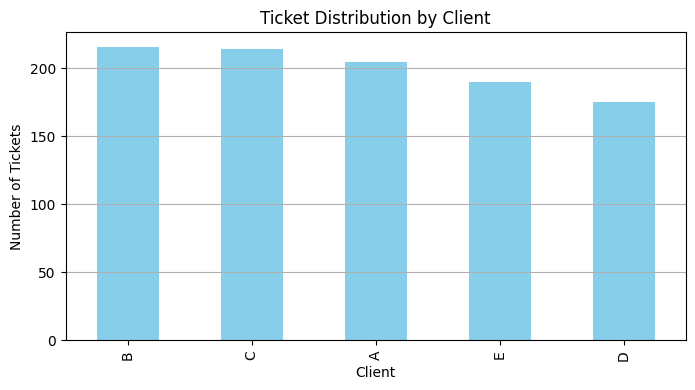

In [35]:
# Visualization: Ticket Distribution by Client
plt.figure(figsize=(8, 4))
client_dist.plot(kind="bar", title="Ticket Distribution by Client", color="skyblue")
plt.xlabel("Client")
plt.ylabel("Number of Tickets")
plt.grid(axis="y")
plt.show()

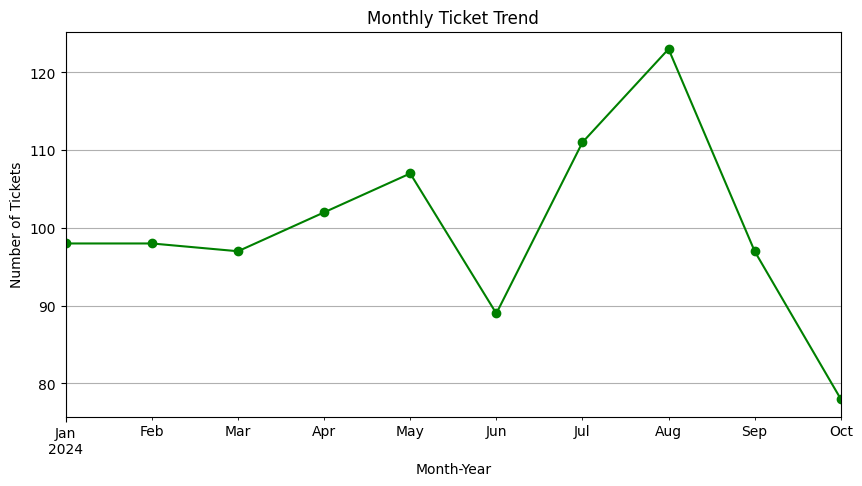

In [36]:
# Visualization: Monthly Ticket Trend
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind="line", marker="o", title="Monthly Ticket Trend", color="green")
plt.xlabel("Month-Year")
plt.ylabel("Number of Tickets")
plt.grid()
plt.show()

### Predictive analysis for next months tickets.

Predicted ticket count for the next month: 98.40


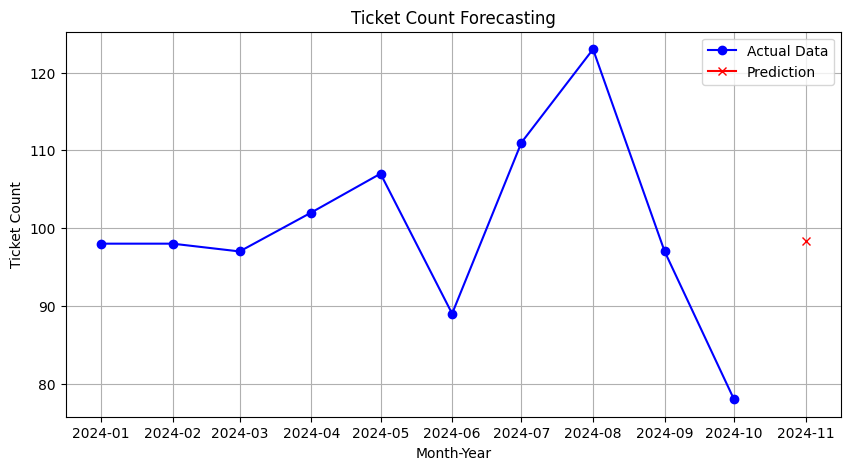

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the dataset for time series forecasting
df["month_year"] = df["logged_date"].dt.to_period("M")
monthly_data = df.groupby("month_year").size().reset_index(name="ticket_count")

# Convert period to datetime for regression analysis
monthly_data["month_year"] = monthly_data["month_year"].dt.to_timestamp()

# Create numerical indices for months
monthly_data["month_index"] = np.arange(len(monthly_data))

# Linear Regression for Forecasting
X = monthly_data["month_index"].values.reshape(-1, 1)
y = monthly_data["ticket_count"].values

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for the next month
next_month_index = len(monthly_data)
predicted_tickets = model.predict([[next_month_index]])

print(f"Predicted ticket count for the next month: {predicted_tickets[0]:.2f}")

# Plotting the trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_data["month_year"], y, label="Actual Data", marker="o", color="blue")
plt.plot(
    [monthly_data["month_year"].iloc[-1] + pd.DateOffset(months=1)],
    predicted_tickets,
    marker="x",
    color="red",
    label="Prediction",
)
plt.title("Ticket Count Forecasting")
plt.xlabel("Month-Year")
plt.ylabel("Ticket Count")
plt.grid()
plt.legend()
plt.show()


### ARIMA analysis

d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predicted ticket count for the next month: 93.73


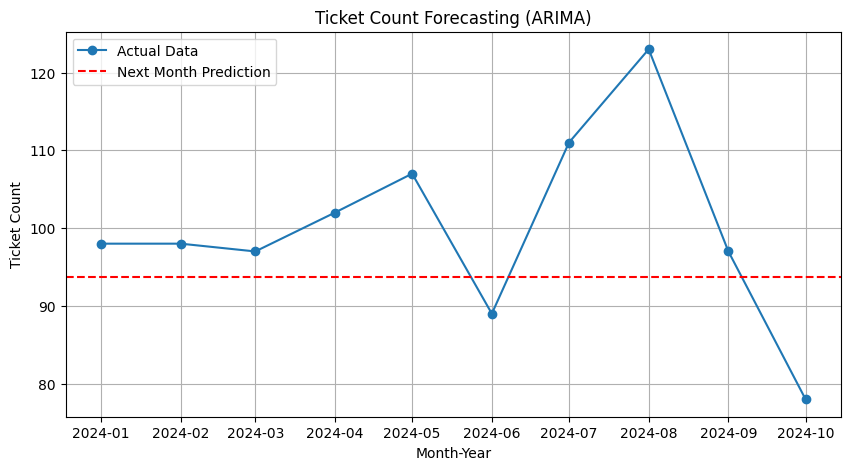

In [38]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Convert logged_date to datetime
df["logged_date"] = pd.to_datetime(df["logged_date"], format="%Y-%m-%d %H:%M:%S UTC")

# Prepare the dataset for time series forecasting
df["month_year"] = df["logged_date"].dt.to_period("M")
monthly_data = df.groupby("month_year").size().reset_index(name="ticket_count")

# Convert period to datetime for time series analysis
monthly_data["month_year"] = monthly_data["month_year"].dt.to_timestamp()
monthly_data.set_index("month_year", inplace=True)

# ARIMA model setup
model = ARIMA(monthly_data["ticket_count"], order=(1, 1, 1))
arima_result = model.fit()

# Forecast for the next month
forecast = arima_result.forecast(steps=1)
predicted_tickets = forecast.iloc[0]

print(f"Predicted ticket count for the next month: {predicted_tickets:.2f}")

# Plotting the actual data and forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data.index, monthly_data["ticket_count"], label="Actual Data", marker="o")
plt.axhline(predicted_tickets, color="red", linestyle="--", label="Next Month Prediction")
plt.title("Ticket Count Forecasting (ARIMA)")
plt.xlabel("Month-Year")
plt.ylabel("Ticket Count")
plt.grid()
plt.legend()
plt.show()

### Holt-Winters Exponential Smoothing

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Setup Holt-Winters model
hw_model = ExponentialSmoothing(monthly_data["ticket_count"], trend="add", seasonal=None, seasonal_periods=None)
hw_result = hw_model.fit()

# Forecast for the next month
hw_forecast = hw_result.forecast(steps=1)
print(f"Predicted ticket count for the next month (Holt-Winters): {hw_forecast.iloc[0]:.2f}")

Predicted ticket count for the next month (Holt-Winters): 98.40


d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Prophet (from META)

In [40]:
from fbprophet import Prophet

# Prepare data for Prophet
prophet_data = monthly_data.reset_index()
prophet_data.columns = ["ds", "y"]

# Train the model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Make prediction for the next month
future = prophet_model.make_future_dataframe(periods=1, freq="M")
forecast = prophet_model.predict(future)

# Extract prediction
predicted_tickets = forecast.iloc[-1]["yhat"]
print(f"Predicted ticket count for the next month (Prophet): {predicted_tickets:.2f}")

# Plot the forecast
prophet_model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

### SARIMA (Seasonal ARIMA)

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA model setup
sarima_model = SARIMAX(monthly_data["ticket_count"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast for the next month
sarima_forecast = sarima_result.forecast(steps=1)
print(f"Predicted ticket count for the next month (SARIMA): {sarima_forecast.iloc[0]:.2f}")


Predicted ticket count for the next month (SARIMA): 78.00


d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters

### Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Prepare data for Random Forest
monthly_data["month_index"] = np.arange(len(monthly_data))
X = monthly_data[["month_index"]]
y = monthly_data["ticket_count"]

# Train the model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Predict for the next month
predicted_tickets = rf_model.predict([[len(monthly_data)]])[0]
print(f"Predicted ticket count for the next month (Random Forest): {predicted_tickets:.2f}")


Predicted ticket count for the next month (Random Forest): 86.17


d:\src_git\learn_ds\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

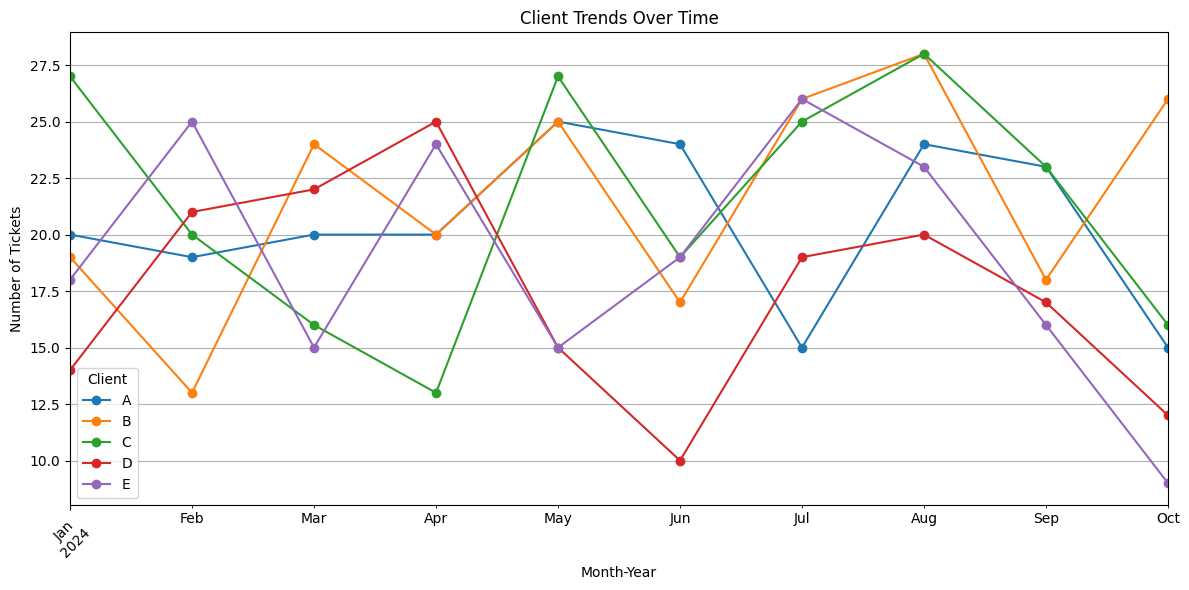

In [43]:
# Convert logged_date to datetime
df["logged_date"] = pd.to_datetime(df["logged_date"], format="%Y-%m-%d %H:%M:%S UTC")

# Extract month and year
df["month_year"] = df["logged_date"].dt.to_period("M")

# Group data by client and month-year
client_trends = df.groupby(["month_year", "client"]).size().unstack(fill_value=0)

# Plot client trends
plt.figure(figsize=(12, 6))
client_trends.plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Client Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Tickets")
plt.legend(title="Client")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()

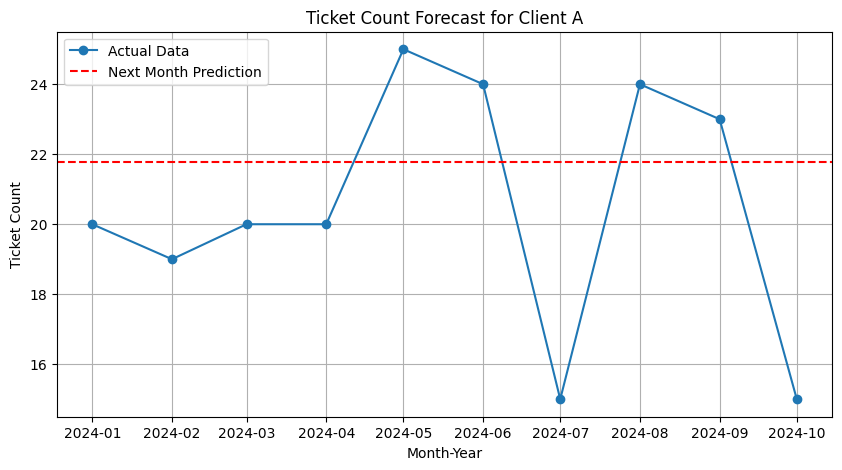

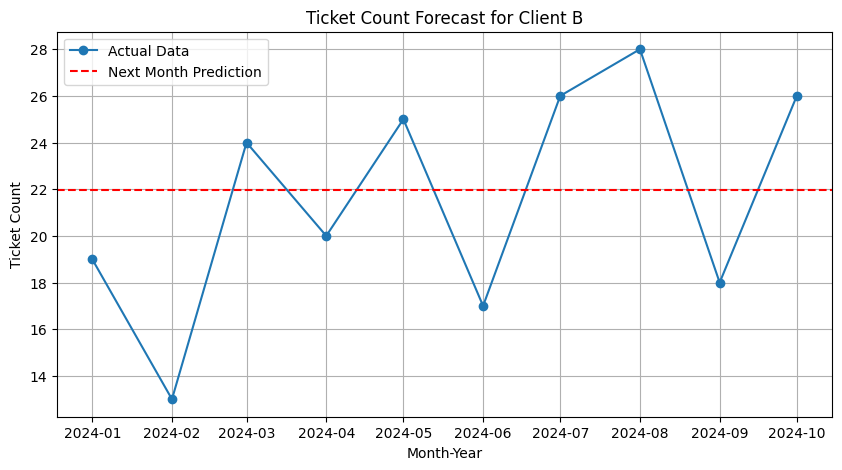

d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


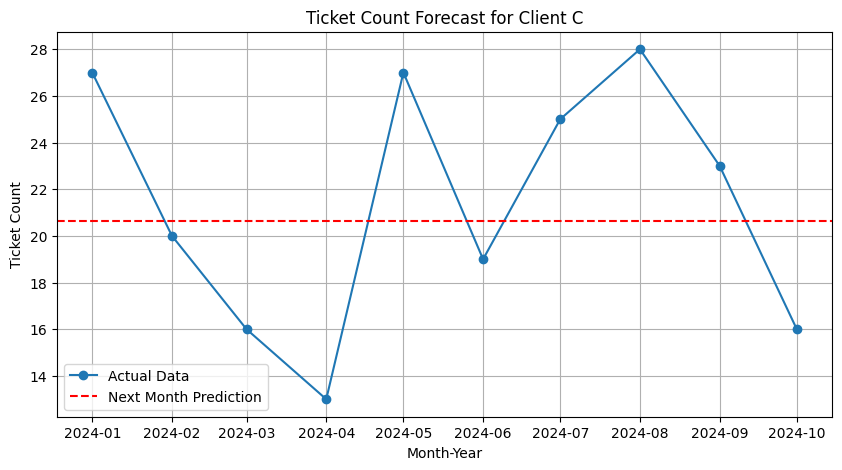

d:\src_git\learn_ds\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


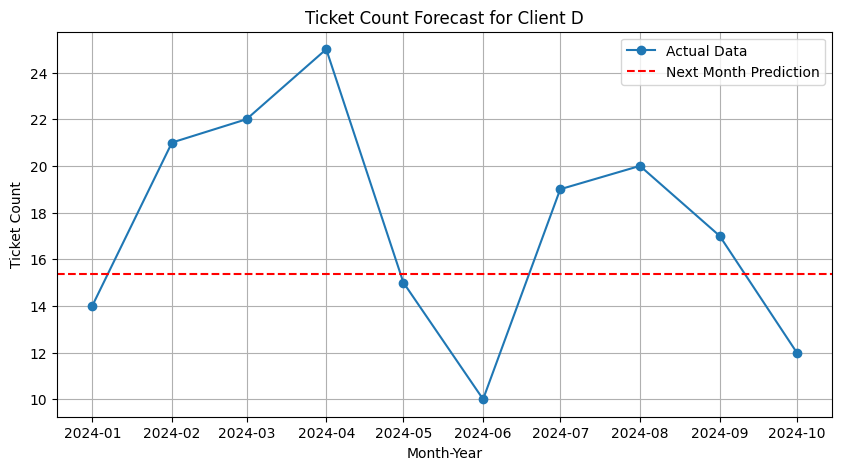

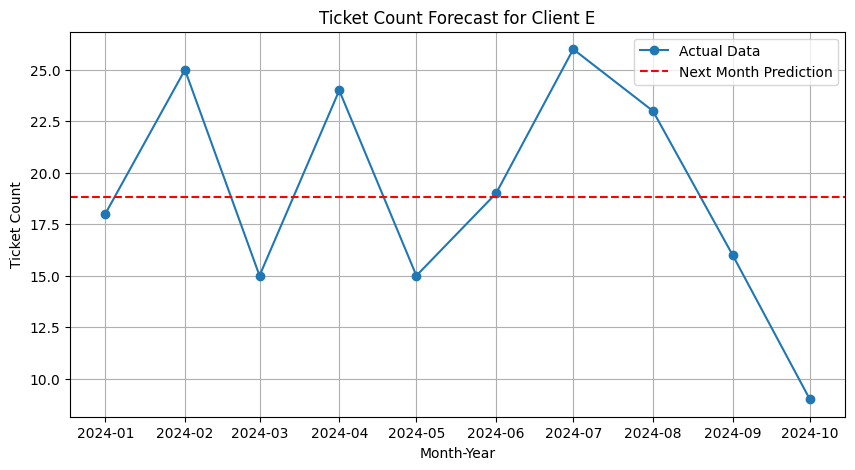

Predicted Ticket Counts for Next Month (by Client):
Client A: 21.78
Client B: 21.95
Client C: 20.65
Client D: 15.37
Client E: 18.80


In [44]:
# Group data by client and month-year
client_trends = df.groupby(["month_year", "client"]).size().unstack(fill_value=0)

# Predictive Analysis for Each Client
predictions = {}
for client in client_trends.columns:
    # Prepare client-specific time series
    client_series = client_trends[client]
    
    # ARIMA model setup
    model = ARIMA(client_series, order=(1, 1, 1))
    arima_result = model.fit()
    
    # Forecast for the next month
    forecast = arima_result.forecast(steps=1)
    predictions[client] = forecast.iloc[0]
    
    # Plot the client trend and prediction
    plt.figure(figsize=(10, 5))
    plt.plot(client_series.index.to_timestamp(), client_series, marker="o", label="Actual Data")
    plt.axhline(forecast.iloc[0], color="red", linestyle="--", label="Next Month Prediction")
    plt.title(f"Ticket Count Forecast for Client {client}")
    plt.xlabel("Month-Year")
    plt.ylabel("Ticket Count")
    plt.legend()
    plt.grid()
    plt.show()

# Display predictions
print("Predicted Ticket Counts for Next Month (by Client):")
for client, count in predictions.items():
    print(f"Client {client}: {count:.2f}")
